#GROUP 2

* Binus University - Data Science - 2602164660 - Dimas Aditya S
* Binus University - Data Science - 2602172050 - Adam Ferdinand M
* Binus University - Data Science - 2602113546 - Muhammad Kaisar N
* Binus University - Data Science - 2602136890 - Arnoldus Purbraye D.S
* Binus University - Data Science - 2602167675 - Solascriptura B S

Import Library and Overview data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('climate_change_data.csv')

In [ ]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [ ]:
df.shape

(10000, 9)

In [ ]:
df.columns

Index(['Date', 'Location', 'Country', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

In [ ]:
#Cek missing value
df.isna().sum()

Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

Missing Value tidak ditemukan

A. Data Understanding

In [ ]:
#Mengdrop variabel yang tidak digunakan
df = df.drop('Country', axis= 1)
df = df.drop('Date', axis=1)
df = df.drop('Location', axis=1)

In [ ]:
df.info() #setelah drop variabel yang tidak terpakai karena bukan numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     10000 non-null  float64
 1   CO2 Emissions   10000 non-null  float64
 2   Sea Level Rise  10000 non-null  float64
 3   Precipitation   10000 non-null  float64
 4   Humidity        10000 non-null  float64
 5   Wind Speed      10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB


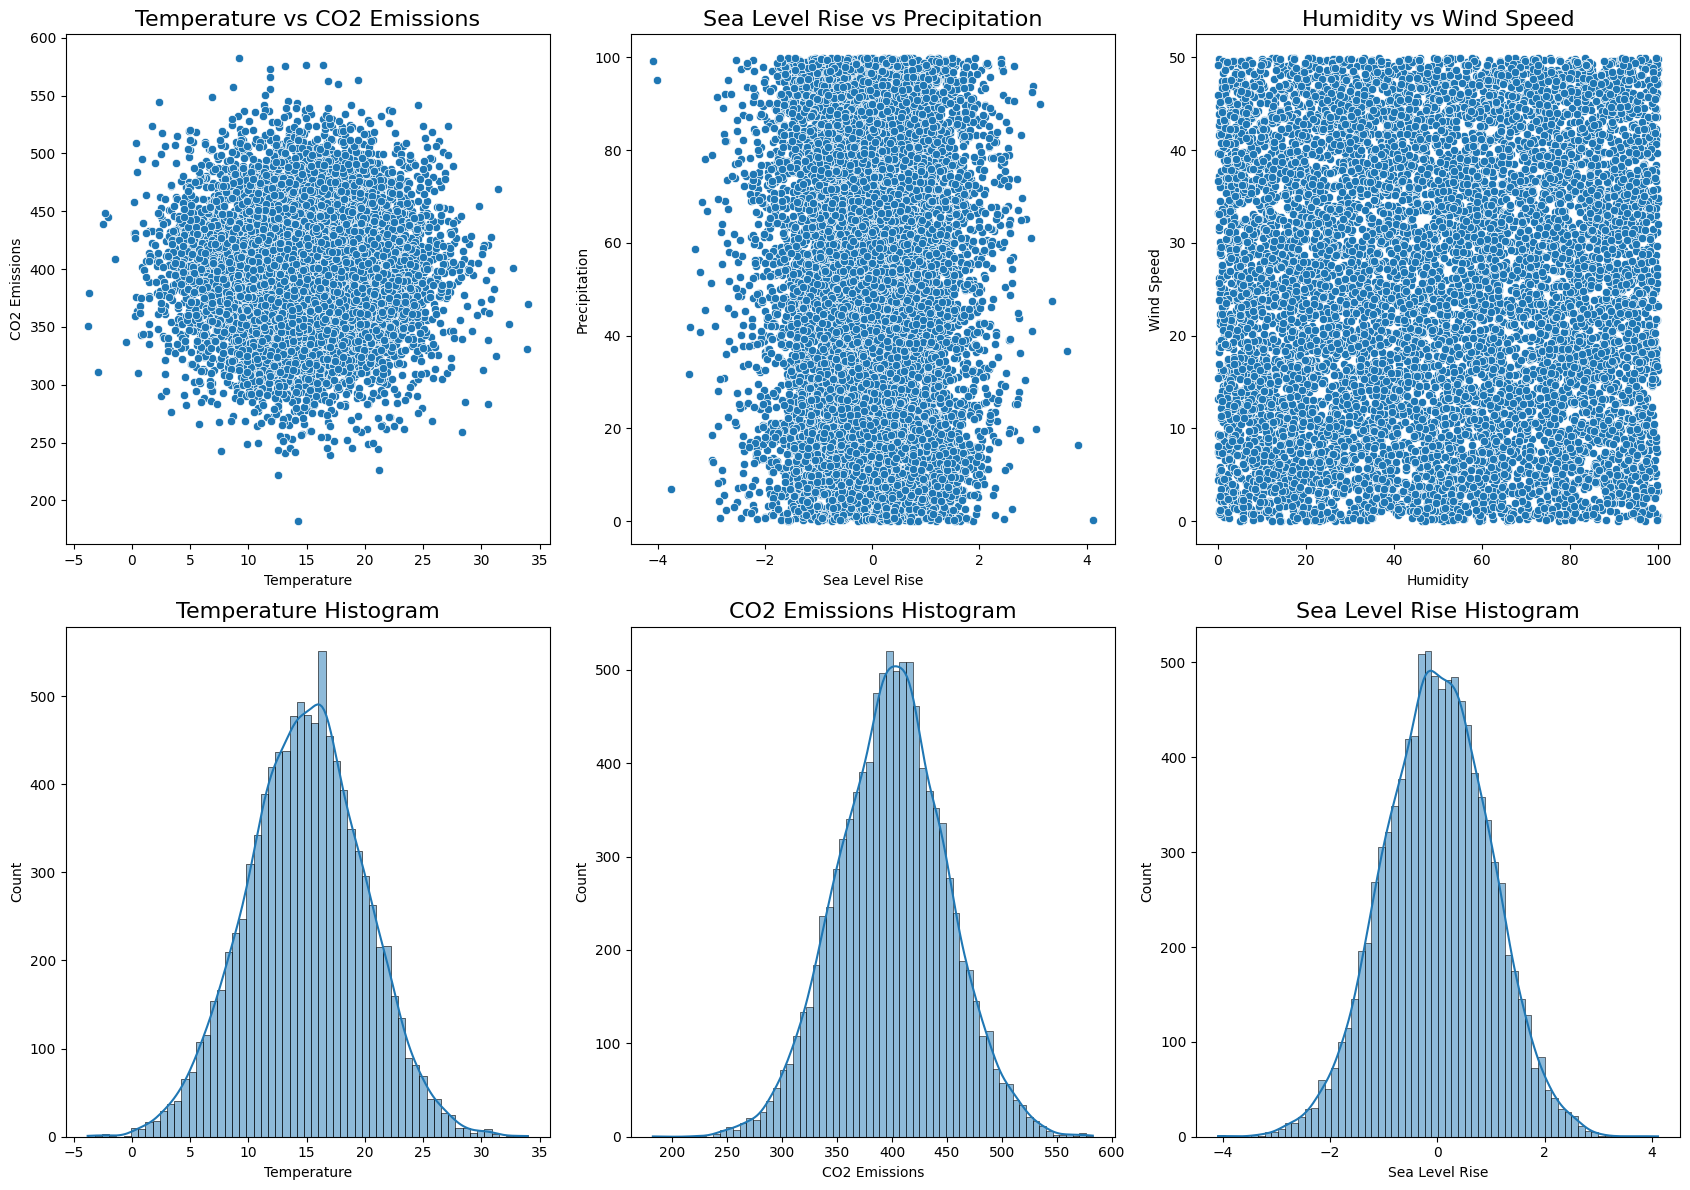

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(17, 12))

plt.subplot(231)
sns.scatterplot(data=df, x='Temperature', y='CO2 Emissions')
plt.title('Temperature vs CO2 Emissions', fontsize=16)

plt.subplot(232)
sns.scatterplot(data=df, x='Sea Level Rise', y='Precipitation')
plt.title('Sea Level Rise vs Precipitation', fontsize=16)

plt.subplot(233)
sns.scatterplot(data=df, x='Humidity', y='Wind Speed')
plt.title('Humidity vs Wind Speed', fontsize=16)

plt.subplot(234)
sns.histplot(data=df, x='Temperature', kde=True)
plt.title('Temperature Histogram', fontsize=16)

plt.subplot(235)
sns.histplot(data=df, x='CO2 Emissions', kde=True)
plt.title('CO2 Emissions Histogram', fontsize=16)

plt.subplot(236)
sns.histplot(data=df, x='Sea Level Rise', kde=True)
plt.title('Sea Level Rise Histogram', fontsize=16)

plt.tight_layout()
plt.show()


B. Feature Engineering

In [ ]:
#Tidak menggunakan Feature Engineering karena datanya sudah bersih sehingga tidak perlu dilakukan apa apalagi

C. Plot dan Model

Model yang dipakai

- Linear Regression
- KNN Regression
- SVR

In [ ]:
#Change to trainset_data and test_data
input_df=df.drop('Temperature',axis=1)
output_df=df['Temperature']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 0)

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(x_train, y_train)

model1_predict = model1.predict(x_test)

# Print model coefficients and intercept
print("R2   : ",r2_score(model1_predict,y_test))
print("MAE  : ",metrics.mean_absolute_error(model1_predict,y_test))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, model1_predict)))
print("MSE  : ",metrics.mean_squared_error(y_test, model1_predict))

R2   :  -633.9434507084757
MAE  :  4.077770409950243
RMSE :  5.078460356725139
MSE  :  25.790759594828824


In [ ]:
#training KNN regression
from sklearn.neighbors import KNeighborsRegressor
KNN_regression = KNeighborsRegressor()
KNN_regression.fit(x_train, y_train)

KNeighborsRegressor()

In [ ]:
y_predict=KNN_regression.predict(x_test)

# Print model coefficients and intercept
print("R2   : ",r2_score(model1_predict,y_test))
print("MAE  : ",metrics.mean_absolute_error(model1_predict,y_test))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_predict)))
print("MSE  : ",metrics.mean_squared_error(y_test, y_predict))

R2   :  -633.9434507084757
MAE  :  4.077770409950243
RMSE :  5.594527320683557
MSE  :  31.29873594187474


R2   :  -0.21776659865171455
MAE  :  4.478327160841997
RMSE :  5.594527320683557
MSE  :  31.29873594187474


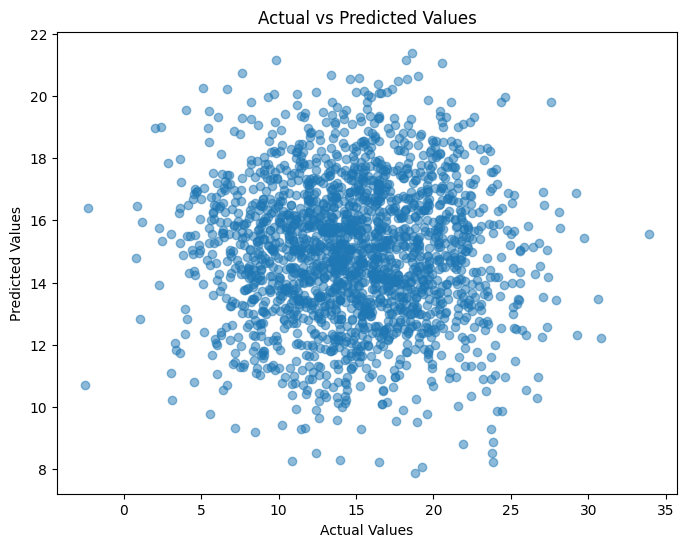

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mse = mean_squared_error(y_test, y_predict)

# Print evaluation metrics
print("R2   : ", r2)
print("MAE  : ", mae)
print("RMSE : ", rmse)
print("MSE  : ", mse)

# Create a plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


In [ ]:
#SVR
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

SVM_regression = make_pipeline(SVR())
SVM_regression.fit(x_train, y_train)

#testing
y_predict=SVM_regression.predict(x_test)

#calculate error for training and testing
print("R2   : ",r2_score(y_predict,y_test))
print("MAE  : ",metrics.mean_absolute_error(y_predict,y_test))
print("RMSE : ",np.sqrt(mean_squared_error(y_test, y_predict)))
print("MSE  : ",metrics.mean_squared_error(y_test, y_predict))

R2   :  -499.2864141728405
MAE  :  4.079116830019385
RMSE :  5.081439870338951
MSE  :  25.82103115587033


R2   :  -0.21776659865171455
MAE  :  4.478327160841997
RMSE :  5.594527320683557
MSE  :  31.29873594187474


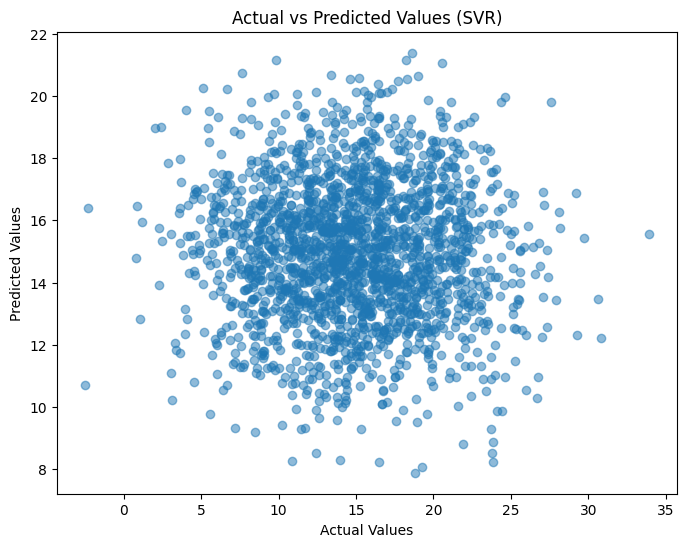

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# Calculate evaluation metrics
r2 = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_predict))
mse = mean_squared_error(y_test, y_predict)

# Print evaluation metrics
print("R2   : ", r2)
print("MAE  : ", mae)
print("RMSE : ", rmse)
print("MSE  : ", mse)

# Create a plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVR)')
plt.show()
